In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


In [4]:
# Confirm output from above

cities

['prince albert',
 'nosivka',
 'rongelap',
 'port-aux-francais',
 'taiohae',
 'adamstown',
 'fort frances',
 'alta',
 'bethel',
 'iqaluit',
 'labytnangi',
 'waitangi',
 'shimoda',
 'edinburgh of the seven seas',
 'ushuaia',
 'college',
 'kudal',
 'vorgashor',
 'petropavlovsk-kamchatsky',
 'alexandria',
 'grytviken',
 'lebu',
 'greymouth',
 'jiutai',
 'qamdo',
 'thompson',
 'enewetak',
 'kirakira',
 'iskateley',
 'wanning',
 'puerto natales',
 'guerrero negro',
 'vila franca do campo',
 'ilulissat',
 'longyearbyen',
 'okahao',
 'udachny',
 'filingue',
 'san pedro',
 'bengkulu',
 'kaa-khem',
 'sandnessjoen',
 'chonchi',
 'abancay',
 'honfleur',
 'mossel bay',
 'chitungwiza',
 'lihue',
 'kodiak',
 'kapit',
 'yuzhno-kurilsk',
 'dryden',
 'ribeira grande',
 'zinjibar',
 'puerto san carlos',
 'bredasdorp',
 'floro',
 'puerto ayora',
 'tazovsky',
 'wailua homesteads',
 'ust-nera',
 'blackmans bay',
 "kinel'-cherkassy",
 'shizunai-furukawacho',
 'essaouira',
 'namibe',
 'mahibadhoo',
 'hafar a

In [5]:
# understanding the json file and functionality of code

url = "http://api.openweathermap.org/data/2.5/weather?"
city = "licheng"
query_url = url + "appid=" + weather_api_key + "&q=" + city

weather_result = requests.get(query_url)
licheg_json = weather_result.json()
licheg_json

{'coord': {'lon': 113.8284, 'lat': 23.2955},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 289.25,
  'feels_like': 289.06,
  'temp_min': 289.25,
  'temp_max': 289.25,
  'pressure': 1019,
  'humidity': 82,
  'sea_level': 1019,
  'grnd_level': 1018},
 'visibility': 10000,
 'wind': {'speed': 2.49, 'deg': 344, 'gust': 3.14},
 'clouds': {'all': 100},
 'dt': 1707239359,
 'sys': {'country': 'CN', 'sunrise': 1707260555, 'sunset': 1707300899},
 'timezone': 28800,
 'id': 1803791,
 'name': 'Licheng',
 'cod': 200}

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"



# query_url = url + "appid=" + weather_api_key + "&q=" + cities

# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
units = "metric"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | prince albert
Processing Record 1 of Set 1 | nosivka
Processing Record 1 of Set 1 | rongelap
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 1 of Set 1 | taiohae
Processing Record 1 of Set 1 | adamstown
Processing Record 1 of Set 1 | fort frances
Processing Record 1 of Set 1 | alta
Processing Record 1 of Set 1 | bethel
Processing Record 1 of Set 1 | iqaluit
Processing Record 1 of Set 1 | labytnangi
Processing Record 1 of Set 1 | waitangi
Processing Record 1 of Set 1 | shimoda
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 1 of Set 1 | ushuaia
Processing Record 1 of Set 1 | college
Processing Record 1 of Set 1 | kudal
Processing Record 1 of Set 1 | vorgashor
Processing Record 1 of Set 1 | petropavlovsk-kamchatsky
Processing Record 1 of Set 1 | alexandria
Processing Record 1 of Set 1 | grytviken
Processing Record 1 of Set 1 | lebu
Processing Record 1

In [23]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"



# query_url = url + "appid=" + weather_api_key + "&q=" + cities

# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json["coord"]["lat"]
        city_lng = weather_json["coord"]["lon"]
        city_max_temp = weather_json["main"]["temp_max"]
        city_humidity = weather_json["main"]["humidity"]
        city_clouds = weather_json["clouds"]["all"]
        city_wind = weather_json["wind"]["speed"]
        city_country = weather_json["sys"]["country"]
        city_date = weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | prince albert
Processing Record 2 of Set 1 | nosivka
Processing Record 3 of Set 1 | rongelap
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | taiohae
City not found. Skipping...
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | fort frances
Processing Record 8 of Set 1 | alta
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | labytnangi
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | shimoda
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | college
Processing Record 17 of Set 1 | kudal
Processing Record 18 of Set 1 | vorgashor
Processing Record 19 of Set 1 | petropavlovsk-kamchatsky
Processing Record 20 of Set 1 | alexandria
Processing Record 21 of Set 1 | grytviken
Processing Reco

In [58]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [59]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,prince albert,53.2001,-105.7677,-7.03,86,75,5.14,CA,1707242083
1,nosivka,50.9315,31.5828,0.24,99,100,2.15,UA,1707242083
2,rongelap,11.1635,166.8941,26.23,83,71,6.90,MH,1707242084
3,port-aux-francais,-49.3500,70.2167,6.12,84,100,11.63,TF,1707242084
4,adamstown,-25.0660,-130.1015,24.81,82,22,1.84,PN,1707242084


In [60]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [61]:
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,prince albert,53.2001,-105.7677,-7.03,86,75,5.14,CA,1707242083
1,nosivka,50.9315,31.5828,0.24,99,100,2.15,UA,1707242083
2,rongelap,11.1635,166.8941,26.23,83,71,6.90,MH,1707242084
3,port-aux-francais,-49.3500,70.2167,6.12,84,100,11.63,TF,1707242084
4,adamstown,-25.0660,-130.1015,24.81,82,22,1.84,PN,1707242084


Latitude Vs. Max Temp

/Users/kennethcarson/anaconda3/envs/dev/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


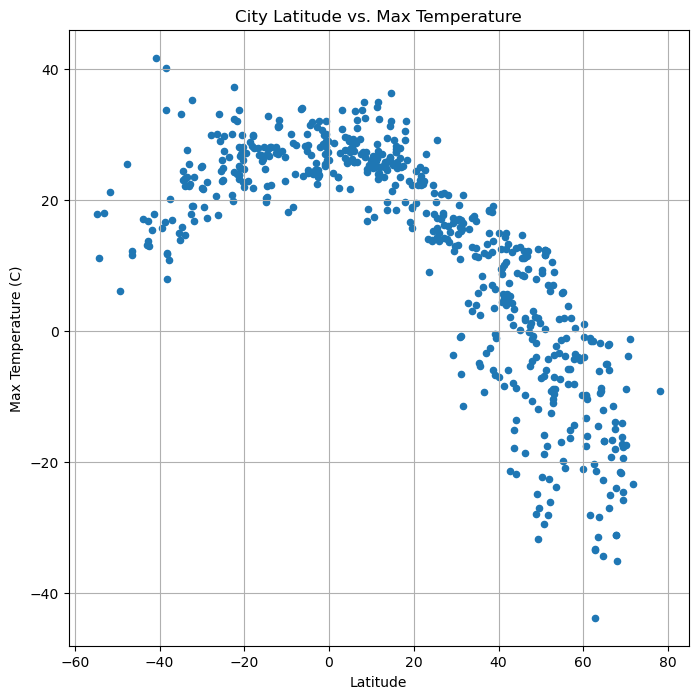

In [26]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(8,8), title=("City Latitude vs. Max Temperature"))

# Incorporate the other graph properties
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

Latitutde Vs. Humidity

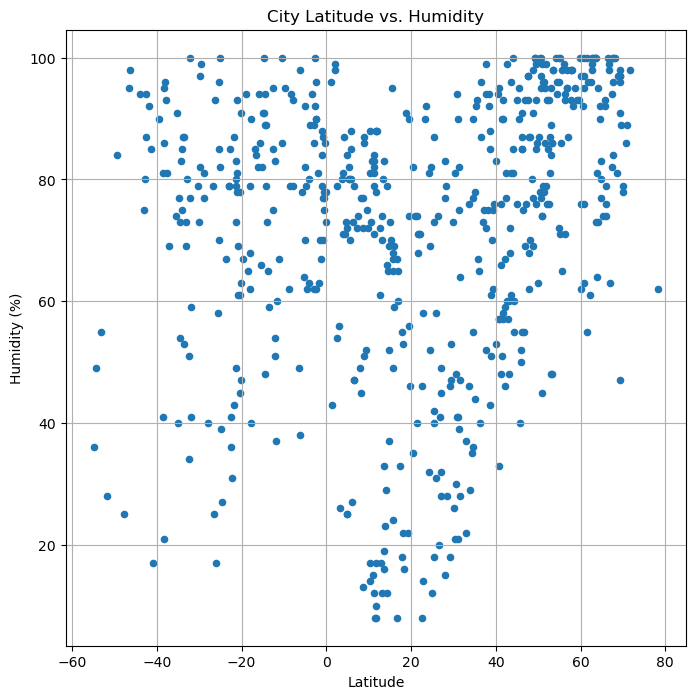

In [28]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(8,8), title=("City Latitude vs. Humidity"))


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

Latitude Vs. Cloudiness

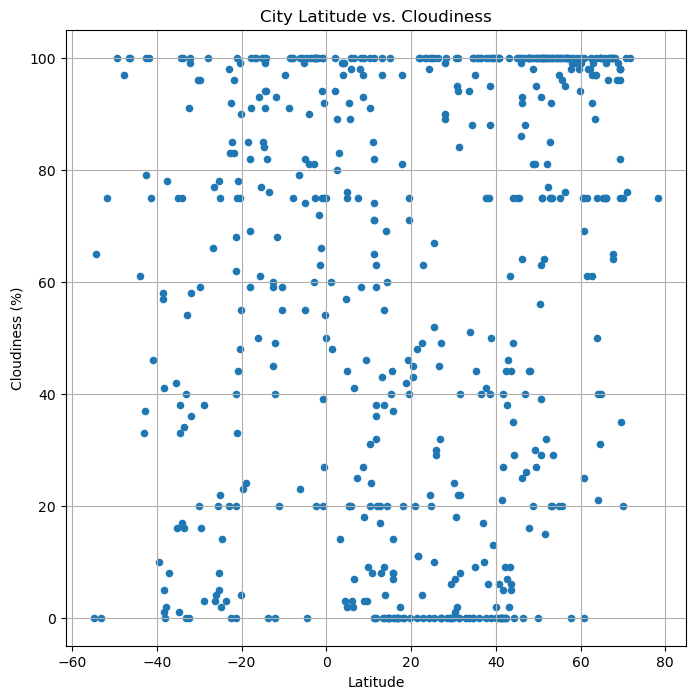

In [29]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(8,8), title=("City Latitude vs. Cloudiness"))


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

Latitude vs. Wind Speed

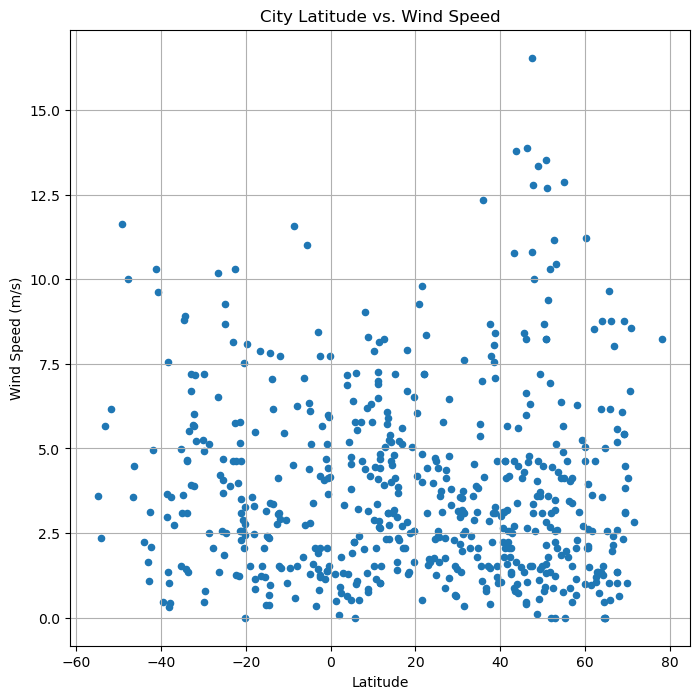

In [30]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(8,8), title=("City Latitude vs. Wind Speed"))


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [ ]:
# Define a function to create Linear Regression plots
# x_values = northern_hemi_df["Lat"]
# y_values = northern_hemi_df["Max Temp"]
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))

# plt.scatter(x_values, y_values)
# plt.plot(x_values, regress_values, "r-")
# plt.annotate(line_eq,(5.8,0.8), fontsize=15, color="red")
# plt.xlabel("Max Temp")
# plt.ylabel("Latitude")
# print(f"The r-value is: {rvalue}")
# plt.show()
                                                        

In [36]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat']>= 0,:])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,prince albert,53.2001,-105.7677,-7.03,86,75,5.14,CA,1707242083
1,nosivka,50.9315,31.5828,0.24,99,100,2.15,UA,1707242083
2,rongelap,11.1635,166.8941,26.23,83,71,6.90,MH,1707242084
5,fort frances,48.5999,-93.4003,2.12,80,100,3.60,CA,1707241803
6,alta,69.9689,23.2717,-17.41,78,75,1.03,NO,1707242084


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat']< 0,:])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,port-aux-francais,-49.3500,70.2167,6.12,84,100,11.63,TF,1707242084
4,adamstown,-25.0660,-130.1015,24.81,82,22,1.84,PN,1707242084
10,waitangi,-43.9535,-176.5597,17.12,94,61,2.24,NZ,1707242085
12,edinburgh of the seven seas,-37.0676,-12.3116,16.89,69,8,2.74,SH,1707242086
13,ushuaia,-54.8000,-68.3000,17.81,36,0,3.60,AR,1707242086


Temp vs. Latitude Linear REgression Plot

The r-value is: -0.8672145380668752


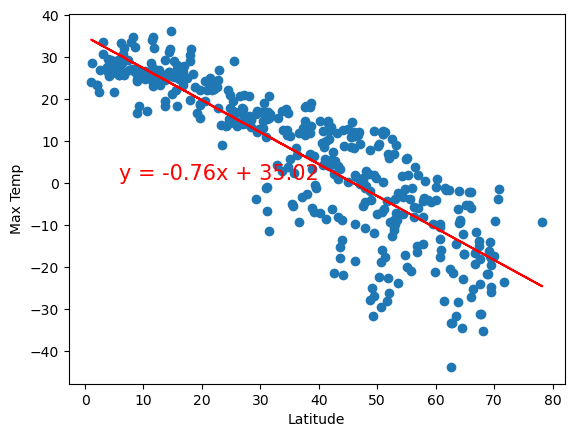

In [48]:
#Linear regression on Northwern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.5253875991756349


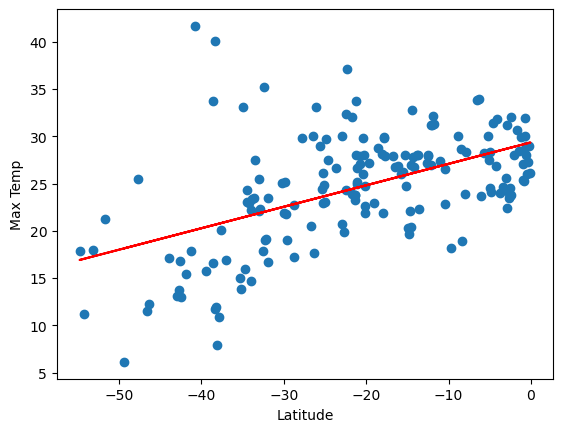

In [56]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue}")
plt.show()

The graphs show that in the norther hemisphere there is a strong, negative association between latitude (how far north the reading was) and maximum temperature.  This is an expected relationship, particularly in winter.  The association in the southern hemisphere is less strong (as evidenced by lower r-value), but that could be in part due to fewer measurements.  The relationship was positive, though this is due to scaling of the plot with distances farther from the equator on the left side.  Rescaling to the absolute value (latitude distance from equator) would have resulted in a negative association as was observed in the Northern Hemisphere.

Humidity vs. Latitude Linear Regression

The r-value is: 0.46823335498506075


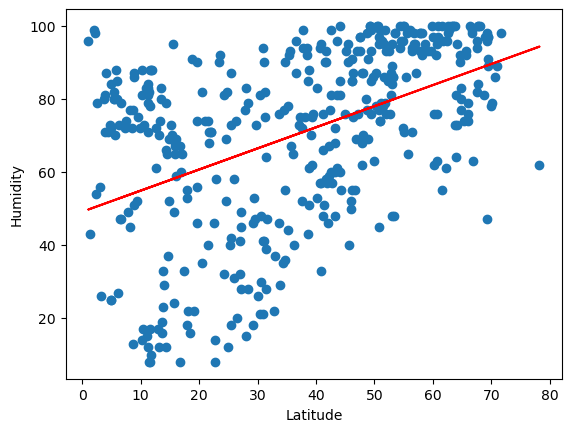

In [51]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.17922738865965912


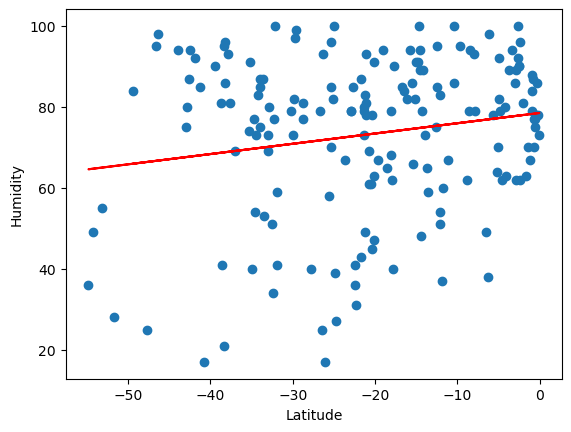

In [57]:
#Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")
plt.show()

There is a relatively weak but positive association between latitude and humidity in the Northern Hemisphere.  There is essentially no association in the Southern Hemisphere.  It is difficult to explain this from the data provided.

Cloudiness vs. Latitude Linear Regression

The r-value is: 0.348021735103686


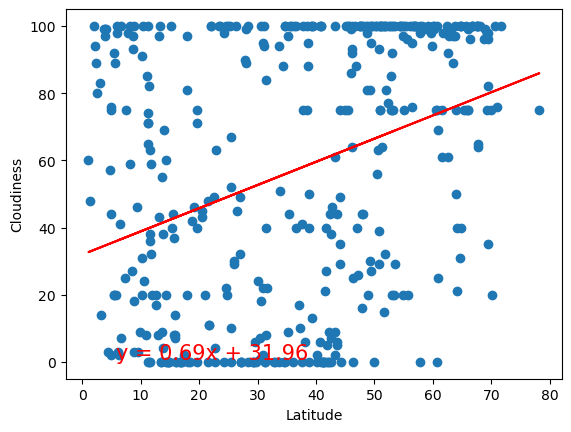

In [52]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.2831627334490792


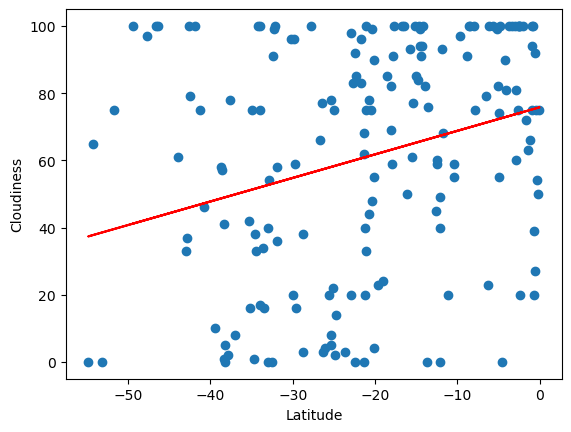

In [53]:
#Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue}")
plt.show()

There is generally no association between cloudiness and latitude.  Interpretation is "clouded" by the largely dichotomous measurement of cloudiness in the Northern Hemisphere.  Very often, cities are 100% vs. 0% cloudy.  Thus, linear regression is not an optimal statistical tool.  Logistic regression could be considered.

Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.024470309207882915


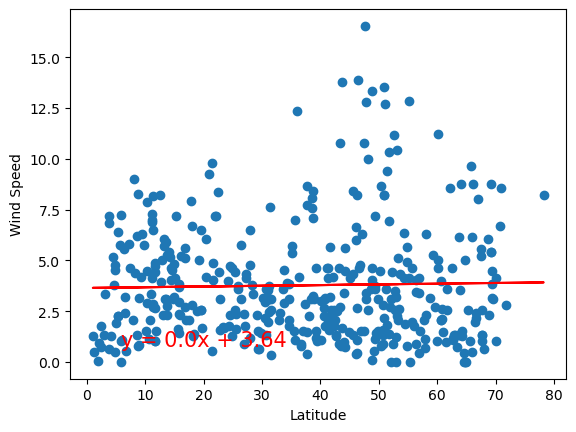

In [54]:

# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.1257346101455089


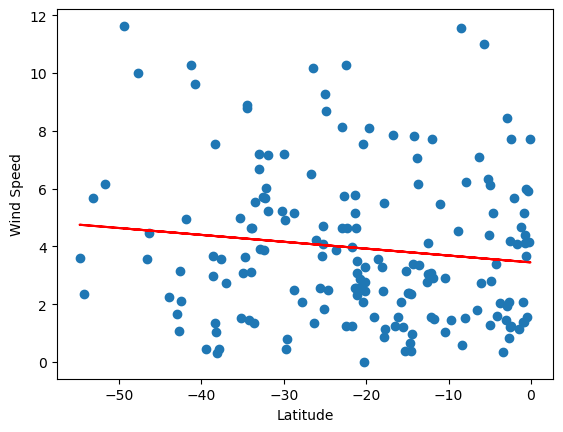

In [55]:
#Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue}")
plt.show()

There is no relationship between wind speed and latitude in the northern or southern hemisphere.  It is likely that variables other than latitude are more likely responsible for wind speed on any given day.